# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109A Introduction to Data Science

## Project Milestone 2 using SEER Breast Cancer Dataset   


**Harvard University**<br/>
**Fall 2022**<br/>
**Instructors**: Pavlos Protopapas, Natesh Pillai, and Chris Gumb

<hr style="height:2pt">

In [70]:
# RUN THIS CELL 
import os
import pathlib
working_dir = pathlib.Path().absolute()
os.chdir(working_dir)

# Import libraries
import itertools
import math

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import pearsonr
from sklearn import linear_model

# pandas tricks for better display
pd.options.display.max_columns = 50  
pd.options.display.max_rows = 500     
pd.options.display.max_colwidth = 100
pd.options.display.precision = 3

%matplotlib inline

## Overview
- A description of the data: what type of data are you dealing with? What methods have you used to explore the data (initial explorations, data cleaning, etc)?
- Visualizations and captions that summarize the noteworthy findings of the exploratory data analysis.
- A revised project question based on your group's interests and the insights gained through EDA. Be sure to keep the scope manageable.
- A baseline model*, either implemented or clearly described.
- 2 or more references (papers, articles, etc.) that your groups thinks will be relevant to guiding your project work. These can be related to methods and/or the problem domain of the project. 

In [29]:
df = pd.read_csv(r"C:\Users\sshukor\OneDrive - Bionano Genomics\Documents\Personal\cs109a\project\data\SEER Breast Cancer Dataset .csv")
headers = list(df.columns)
n_cols = len(df.columns)
n_rows = len(df)

print(f"There are {n_rows} rows and {n_cols} columns in the dataset, with the following predictors \
        \n {headers}")

There are 4024 rows and 15 columns in the dataset, with the following predictors         
 ['Age', 'Race ', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status', 'Progesterone Status', 'Regional Node Examined', 'Reginol Node Positive', 'Survival Months', 'Status']


#### Breast Cancer 

***[what is breast cancer, brief basic bio stuff]***

***[current breast cancer statistics from litterature and includes proper citation (lastname et al. year) for example) and then doc/pdf will have full reference]***

#### Data description

The dataset we are working with is from breast cancer patients obtained from the 2017 November update of the SEER Program of the NCI (Teng (2019)). Specifically, this is a dataset of female patients with infiltrating duct and lobular carcinoma breast cancer diagnosed between 2006-2010 (Teng (2019)). According to Teng (2019) 'patients with unknown tumor size, examined regional lymph nodes (LNs), regional positive LNs, and patients whose survival months that were less than 1 month were excluded; thus, about 4024 patients were ultimately included' in this dataset. There was one duplicate patient data, thus the overall data consists of 4023 observations. Each row of dataset corresponds to a unique patient data described by 15 features (columns 1-15). The class label, which is the Status column, is provided in the last column. 

- **Age**: age at diagnosis in years.  
- **Race**: race of each patient, labeled as White, Black, Other. Orginialy labeled as 'Other (American Indian/AK Native, Asian/Pacific Islander),' but we shortened it to Other. 
- **Marital_Status**: marital status at diagnosis, labeled as Single, Married, Separated, Divorced, Widowed. Originally, labeled as ‘Single (never married)’ and ‘Married (including common law),' but we shortened it to Single and Married. 
- **T_Stage**: part of the TNM system, the T stands for tumor and provides information regarding size and location of the tumor. This dataset contains T1-4. 
    - T1 the tumor is 20 millimeters or smaller 
    - T2 the tumor is larger than 20 millimeters but not larger than 50 millimeters
    - T3 the tumor is larger than 50 millimeters
    - T4 the tumor is of any size that is inflammatory and/or has infiltrated chest wall and/or skin
- **N_Stage**: part of the TNM system, the N stands for lymph node and provides information regarding size and location of lymph nodes where cancer has spread. This dataset contains N1-3. 
     - The N1-3 indicates involvement of regional lymph nodes (number and/or extent of spread) where a higher number, N3, means the cancer is in more lymph nodes, farther away from the original tumor.
- **6th_Stage**: new stage classification, this dataset contains stage II (IIA and IIB) and stage III (IIIA,IIIB, and IIIC):
    - for IIA is defined as either:
        - is not a tumor but is a cancer that as spread to lymph nodes
        - is a tumor less than 2 cm and a cancer that has spread to lymph nodes 
        - is a tumor between than 2-5 cm but is not a cancer that has spread to lymph nodes
     - for IIB is defined as either:
         - is a tumor between than 2-5 cm and a cancer that has spread to lymph nodes
         - is a tumor larger than 5 cm but is not a cancer that has spread to lymph nodes
     - for IIIA is defined as either:
        - is a tumor less than 2 cm and a cancer that has spread to 4-9 lymph nodes 
        - is a tumor larger than 5 cm and cancer clusters found in lymph nodes
        - is a tumor larger than 5 cm and cancer has spread to lymph nodes near the breastbone or underarm
     - for IIIB is defined as:
         - is a tumor of any size, cancer has spread to chest wall or breast skin, and cancer has spread to lymph nodes
     - for IIIC is defined as either:
        - not a tumor but a cancer that has spread to 10+ lymph nodes 
        - not a tumor but a cancer that has spread to lymph nodes near collar bone 
        - not a tumor but a cancer that has spread to lymph nodes near underarm or breast bone 
- **Grade**: the grading system is used to describe how quickly a breast tumor is likely to grow and spread, this dataset includes Grade I-IV: 
    - Grade I is well differentiated
    - Grade II is moderately differentiated
    - Grade III is poorly differentiated
    - Grade IV is undifferentiated or anaplastic
- **A_Stage**: according to Teng (2019) it is a simplified version of stage: in situ, localized, regional, distant, & unknown in the dataset this is summarized as either: 
    - regional—a neoplasm that has extended either
        - beyond the limits of the organ of origin directly into surrounding organs or tissues; 
        - into regional lymph nodes by way of the ymphatic system; or 
        - by a combination of extension and regional lymph nodes.
    - distant—a neoplasm that has spread to parts of the body remote from the primary tumor either by direct extension or by discontinuous metastasis (e.g., implantation or seeding) to distant organs, issues, or via the lymphatic system to distant lymph nodes
- **Tumor_Size**: size of tumor in millimeters. 
- **Estrogen_Status**: a biomarker, breast cancer cells that have estrogen receptors are positive and breast cancer cells that do not have estrogen receptors are negative.
- **Progesterone_Status**: a biomarker, breast cancer cells that have progesterone receptors are positive and breast cancer cells that do not have progesterone receptors are negative.        
- **Regional_Node_Examined**: total number of regional lymph nodes that were removed and examined.    
- **Reginol_Node_Positive**: the number of regional lymph nodes found to contain metastases. 
- **Survival_Months**: survival in months based on complete dates.             
- **Status**: class label of either alive or dead calculated using study cutoff.                      

**For more detail about biological definitions of features in this dataset you can refer to [National Breast Cancer](https://www.nationalbreastcancer.org/what-is-breast-cancer/) and [IEEE Dataport](https://dx.doi.org/10.21227/a9qy-ph35) sites.**

![](seer_summary_table.png)

In [30]:
def corrfunc(x, y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    ax.annotate(f'ρ = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)

In [31]:
df.describe(include='all')

Age  Race                   Marital Status T Stage  N Stage  \
count   4024.000000   4024                            4024     4024    4024   
unique          NaN      3                               5        4       3   
top             NaN  White  Married (including common law)       T2      N1   
freq            NaN   3413                            2643     1786    2732   
mean      53.972167    NaN                             NaN      NaN     NaN   
std        8.963134    NaN                             NaN      NaN     NaN   
min       30.000000    NaN                             NaN      NaN     NaN   
25%       47.000000    NaN                             NaN      NaN     NaN   
50%       54.000000    NaN                             NaN      NaN     NaN   
75%       61.000000    NaN                             NaN      NaN     NaN   
max       69.000000    NaN                             NaN      NaN     NaN   

       6th Stage                                Grade   A Stage   Tumor Size  \
count       4024                                 4024      4024  4024.000000   
unique         5                                    4         2          NaN   
top          IIA  Moderately differentiated; Grade II  Regional          NaN   
freq        1305                                 2351      3932          NaN   
mean         NaN                                  NaN       NaN    30.473658   
std          NaN                                  NaN       NaN    21.119696   
min          NaN                                  NaN       NaN     1.000000   
25%          NaN                                  NaN       NaN    16.000000   
50%          NaN                                  NaN       NaN    25.000000   
75%          NaN                                  NaN       NaN    38.000000   
max          NaN                                  NaN       NaN   140.000000   

       Estrogen Status Progesterone Status  Regional Node Examined  \
count             4024                4024             4024.000000   
unique               2                   2                     NaN   
top           Positive            Positive                     NaN   
freq              3755                3326                     NaN   
mean               NaN                 NaN               14.357107   
std                NaN                 NaN                8.099675   
min                NaN                 NaN                1.000000   
25%                NaN                 NaN                9.000000   
50%                NaN                 NaN               14.000000   
75%                NaN                 NaN               19.000000   
max                NaN                 NaN               61.000000   

        Reginol Node Positive  Survival Months Status  
count             4024.000000      4024.000000   4024  
unique                    NaN              NaN      2  
top                       NaN              NaN  Alive  
freq                      NaN              NaN   3408  
mean                 4.158052        71.297962    NaN  
std                  5.109331        22.921430    NaN  
min                  1.000000         1.000000    NaN  
25%                  1.000000        56.000000    NaN  
50%                  2.000000        73.000000    NaN  
75%                  5.000000        90.000000    NaN  
max                 46.000000       107.000000    NaN

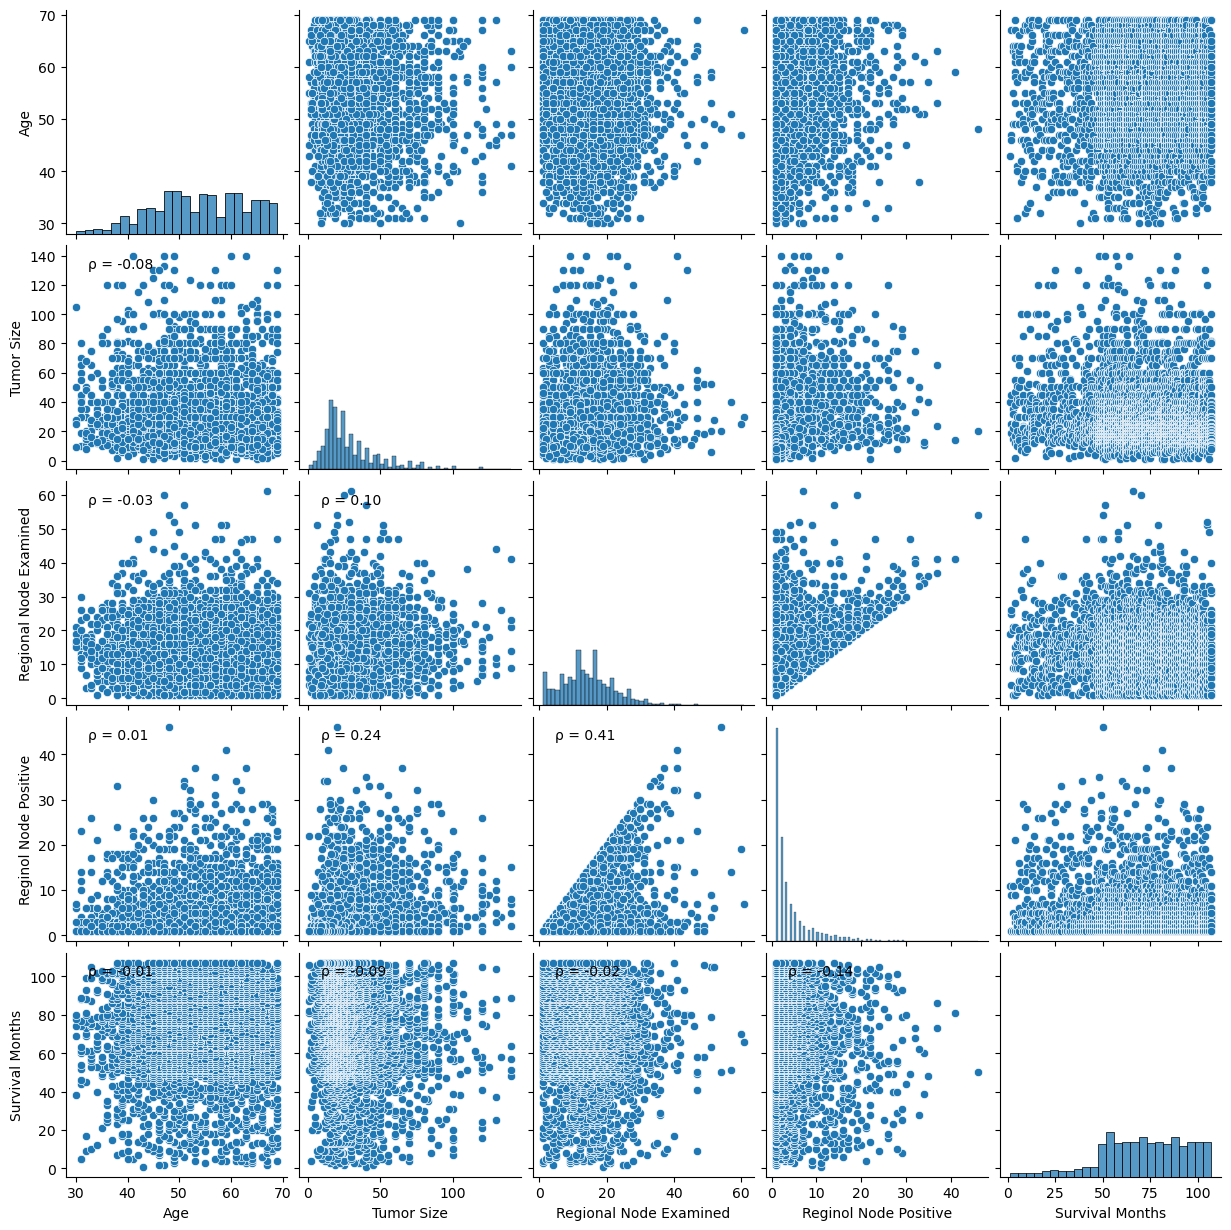

In [19]:
a = sns.pairplot(df)
a.map_lower(corrfunc)
plt.show()

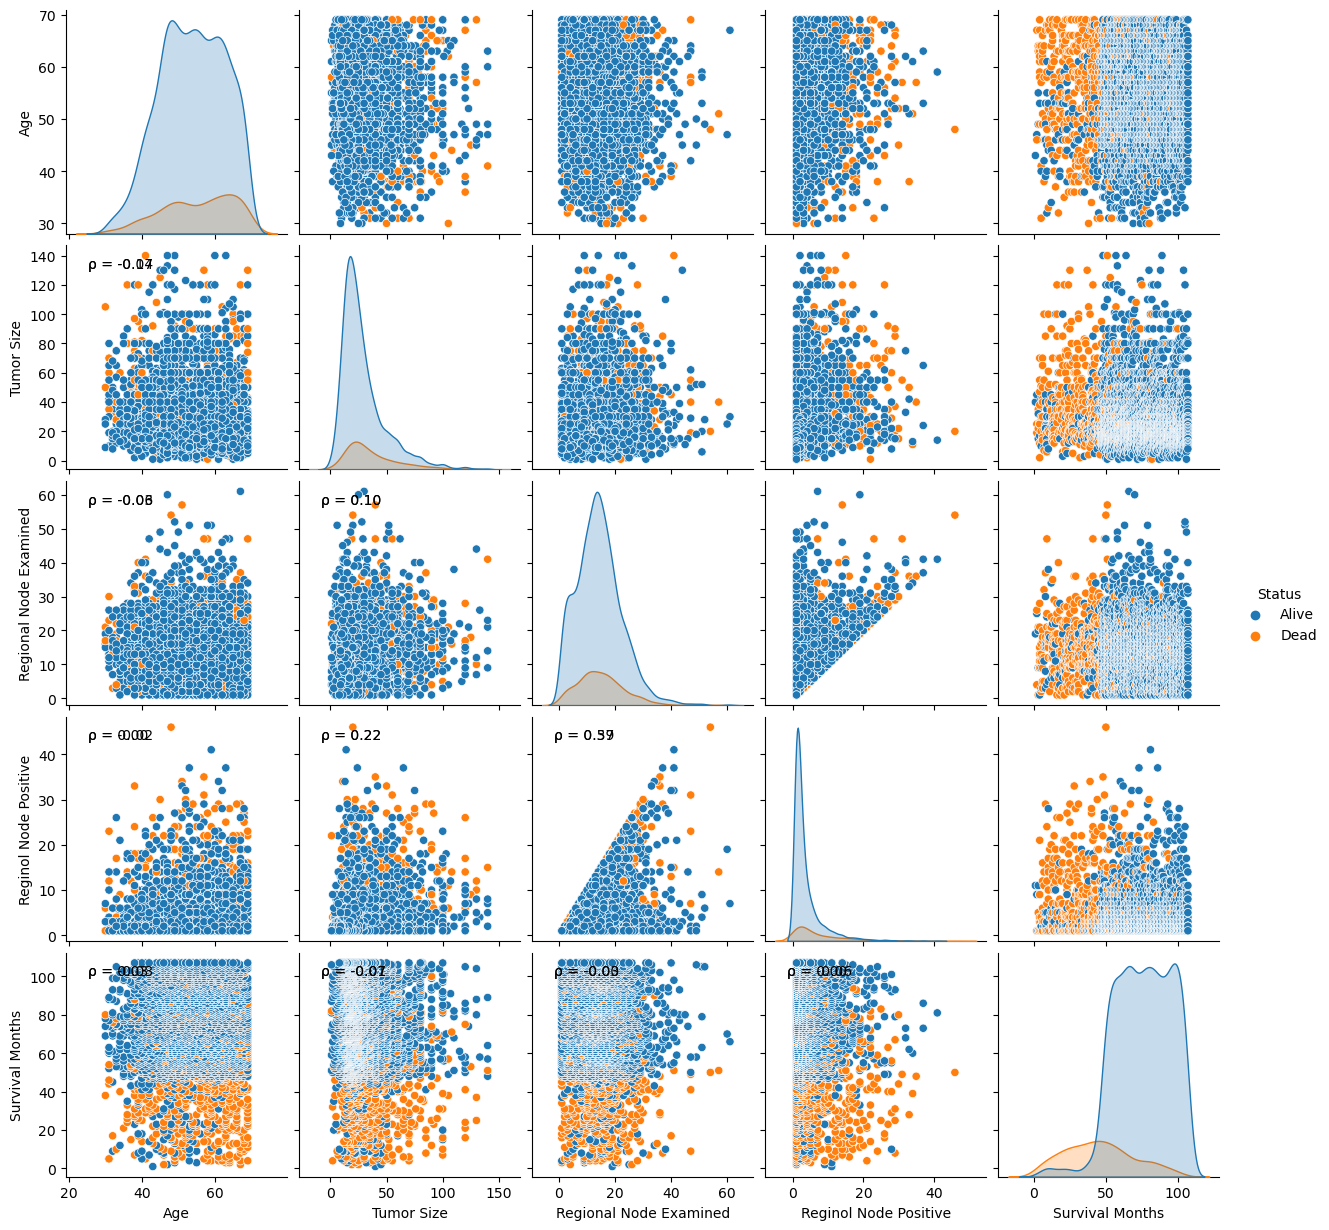

In [32]:
b = sns.pairplot(df, hue="Status")
b.map_lower(corrfunc)
plt.show()

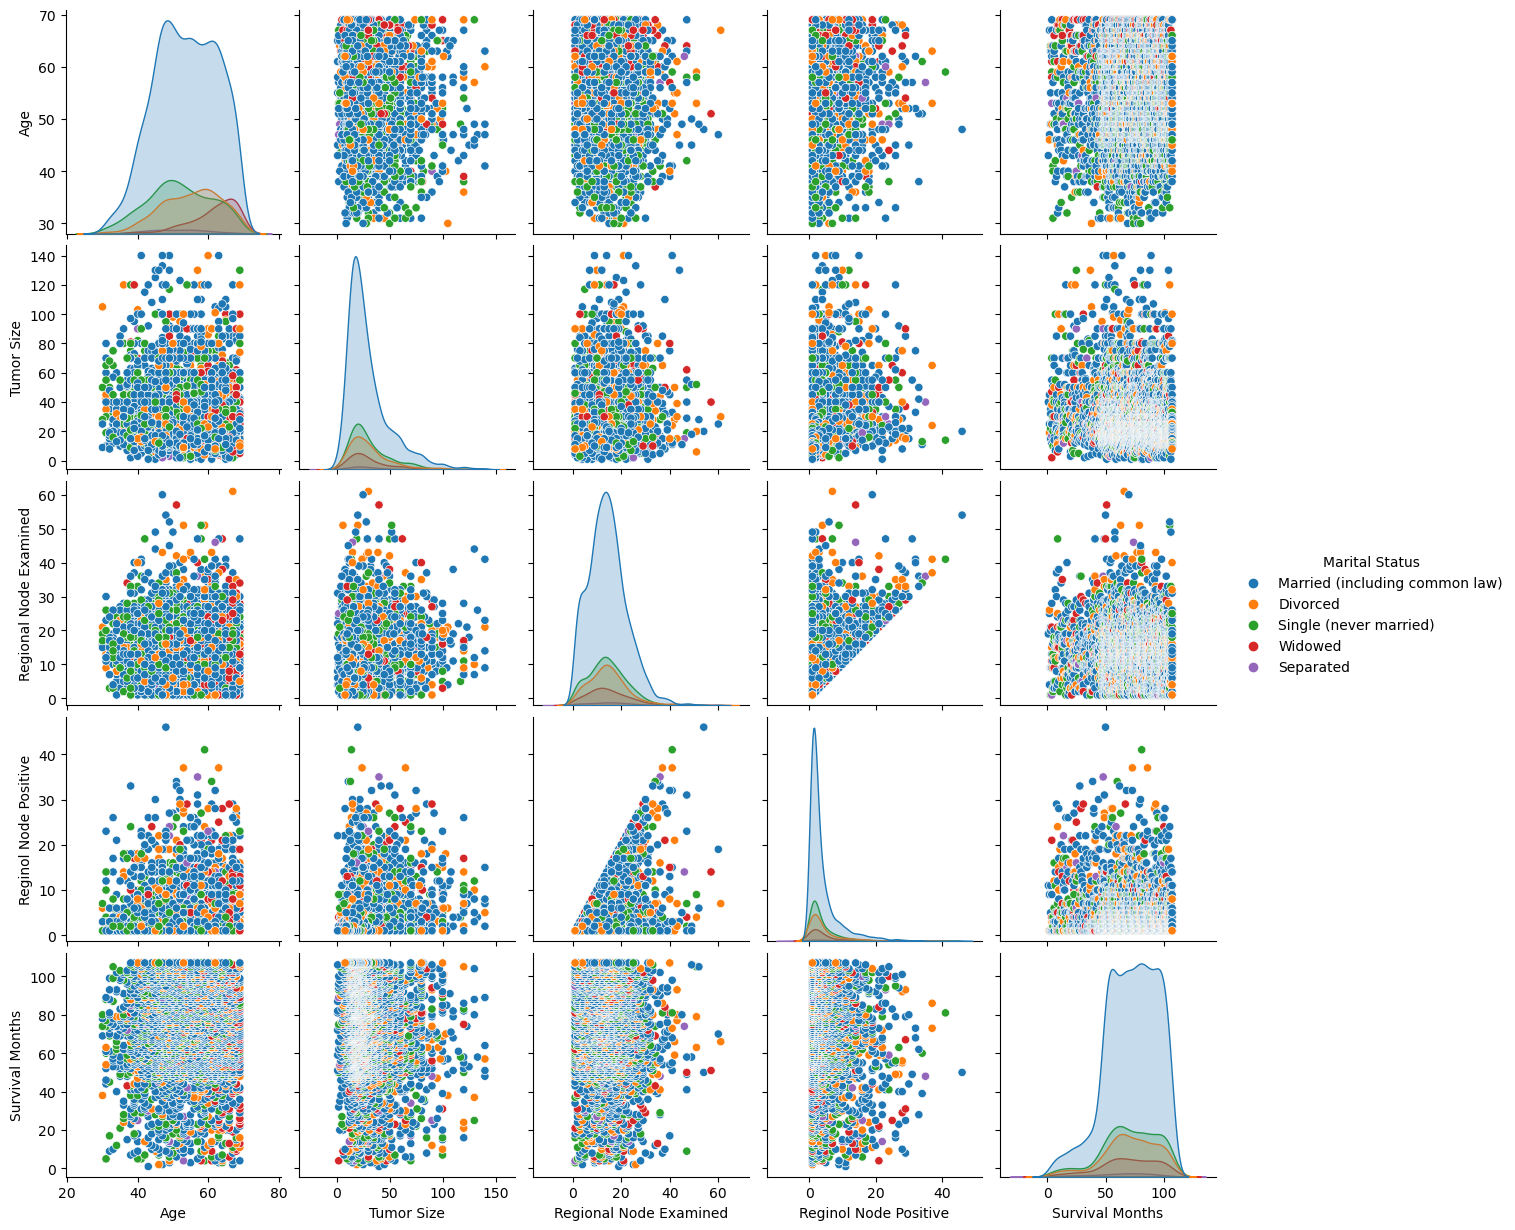

In [22]:
sns.pairplot(df, hue="Marital Status")

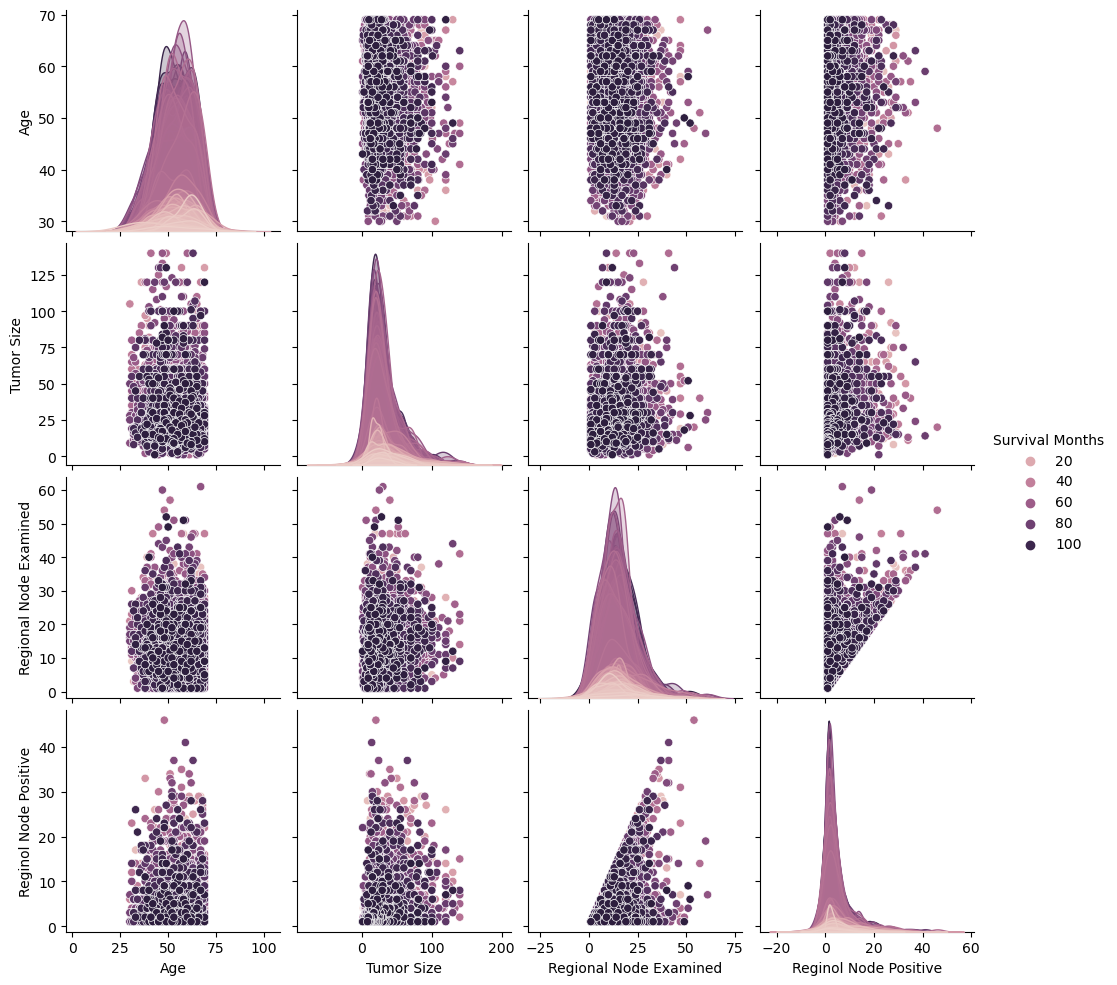

In [62]:
sns.pairplot(df, hue="Survival Months")

In [64]:
df.loc[df["Status"] == "Alive"].corr()

Age  Tumor Size  Regional Node Examined  \
Age                     1.000000   -0.072363               -0.030576   
Tumor Size             -0.072363    1.000000                0.101733   
Regional Node Examined -0.030576    0.101733                1.000000   
Reginol Node Positive   0.002804    0.218880                0.373684   
Survival Months         0.031981   -0.013899               -0.000625   

                        Reginol Node Positive  Survival Months  
Age                                  0.002804         0.031981  
Tumor Size                           0.218880        -0.013899  
Regional Node Examined               0.373684        -0.000625  
Reginol Node Positive                1.000000         0.002871  
Survival Months                      0.002871         1.000000

In [65]:
df.loc[df["Status"] == "Dead"].corr()

Age  Tumor Size  Regional Node Examined  \
Age                     1.000000   -0.142013               -0.058177   
Tumor Size             -0.142013    1.000000                0.096461   
Regional Node Examined -0.058177    0.096461                1.000000   
Reginol Node Positive  -0.015900    0.221288                0.585489   
Survival Months        -0.030381   -0.073308               -0.030102   

                        Reginol Node Positive  Survival Months  
Age                                 -0.015900        -0.030381  
Tumor Size                           0.221288        -0.073308  
Regional Node Examined               0.585489        -0.030102  
Reginol Node Positive                1.000000        -0.064184  
Survival Months                     -0.064184         1.000000

- There is multicollinearity between `Regional Node Positive` and `Regional Node Examined`.

## Data Modeling Ideas

-   Regression Problem: Predicting Cancer Survival Months.
    -   Should we weight more on dead patients?
    -   Start with regular regression into boosting

In [33]:
df.columns

Index(['Age', 'Race ', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')

In [56]:
y = df["Survival Months"]
x = df.drop(columns="Survival Months", axis=1)

linreg = LinearRegression()